In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_bank = pd.read_csv(r"C:\Users\Maeloc\Desktop\IT_Academy\Simulador\repo\ProjecteData\Equip_16\Borrador\Perfil de cliente\eda_raw_23092025.csv")

Ino general del dataset

In [15]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16172 entries, 0 to 16171
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         16172 non-null  int64  
 1   age        16155 non-null  float64
 2   job        16172 non-null  object 
 3   marital    16165 non-null  object 
 4   education  16164 non-null  object 
 5   default    16172 non-null  object 
 6   balance    16172 non-null  int64  
 7   housing    16152 non-null  object 
 8   loan       16172 non-null  object 
 9   contact    16172 non-null  object 
 10  day        16172 non-null  int64  
 11  month      16172 non-null  object 
 12  duration   16172 non-null  int64  
 13  campaign   16172 non-null  int64  
 14  pdays      16172 non-null  int64  
 15  previous   16172 non-null  int64  
 16  poutcome   16172 non-null  object 
 17  deposit    16172 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 2.2+ MB


Descripción de variables numéricas:

In [16]:
df_bank.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,16172.000000,16155.00000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000
mean,9699.646302,41.22086,1508.458632,15.657062,374.053178,2.507791,51.800952,0.838115
std,6755.278621,11.93722,3164.045641,8.419686,348.977261,2.703518,109.819968,2.326407
min,1.000000,18.00000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,4042.750000,32.00000,121.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,8083.500000,39.00000,544.000000,15.000000,256.000000,2.000000,-1.000000,0.000000
75%,17346.250000,49.00000,1697.000000,22.000000,500.250000,3.000000,33.000000,1.000000
max,21383.000000,95.00000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Apuntes interesantes

- Edad (age): Clientes entre 18 y 95 años (amplio rango), media 41.

- Saldo (balance): Promedio 1.500€, pero con gran variabilidad (-6847 a 81204€). Heterogeneidad financiera y diferentes capacidades entre clientes.

- Día del último contacto o interacción (days): promedio 15.

- Duración de contacto (duration): Variablididad. Media 6,23 min, máximo 1 hora (approx). Interacciones muy largas podrían reflejar casos complejos o clientes muy interesados.

- Número de contactos durante la actual campaña (campaign): Variabilidad, muchos clientes con pocos contactactos solo una vez; algunos han recibido más de 60 interacciones.

- Número de contactos durante la actual campaña (campaign): Promedio 2.5 contactos. Muchos clientes reciben solo 1–3 contactos; algunos casos extremos (>60) muestran clientes difíciles de convencer o campañas intensivas.

- Días desde último contacto (pdays): Media 51 días. Muchos clientes nunca fueron contactados antes (pdays=-1). Para los contactados, el tiempo desde el último contacto varía mucho (hasta 854 días).

- Número de contactos previos (previous): Media 0.83 contactos previos. La mayoría de clientes no tiene historial; algunos tienen historial intenso (>50 contactos). 

Descripción de variables categóricas:
- count → número de valores no nulos

- unique → número de categorías únicas

- top → categoría más frecuente

- freq → frecuencia de la categoría más frecuente

In [17]:
# Resumen de variables categóricas
df_bank.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,16172,16165,16164,16172,16152,16172,16172,16172,16172,16172
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,3731,9191,7913,15931,8542,14053,11685,4076,12048,8470


Gráficos de variables numéricas

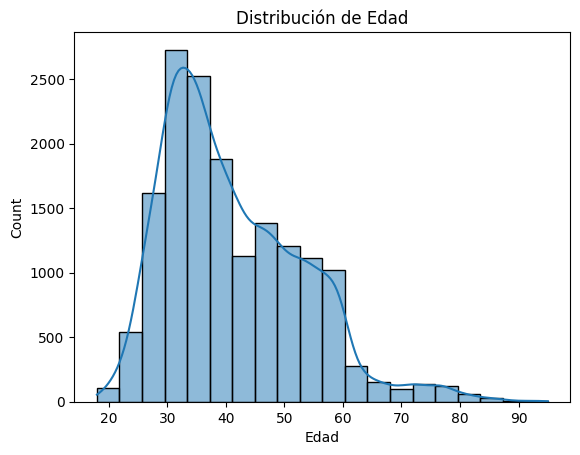

In [18]:
# Histograma de age
sns.histplot(df_bank['age'], bins=20, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.show()

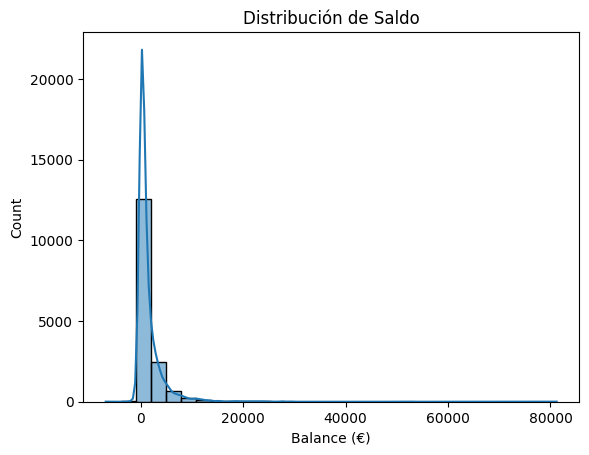

In [19]:
# Histograma y boxplot de balance
sns.histplot(df_bank['balance'], bins=30, kde=True)
plt.title("Distribución de Saldo")
plt.xlabel("Balance (€)")
plt.show()

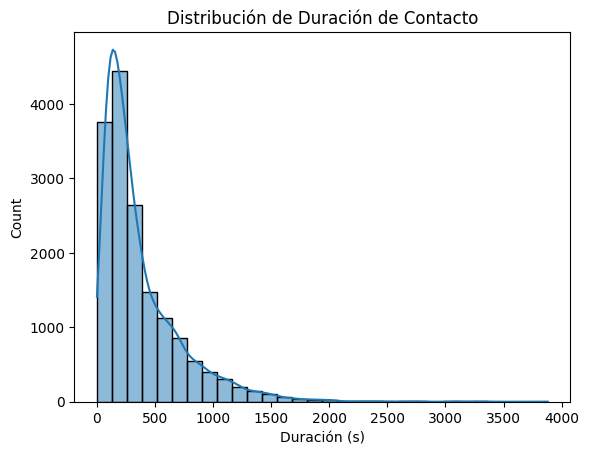

In [20]:
# Histograma de duration
sns.histplot(df_bank['duration'], bins=30, kde=True)
plt.title("Distribución de Duración de Contacto")
plt.xlabel("Duración (s)")
plt.show()

Gráficos para variables categóricas

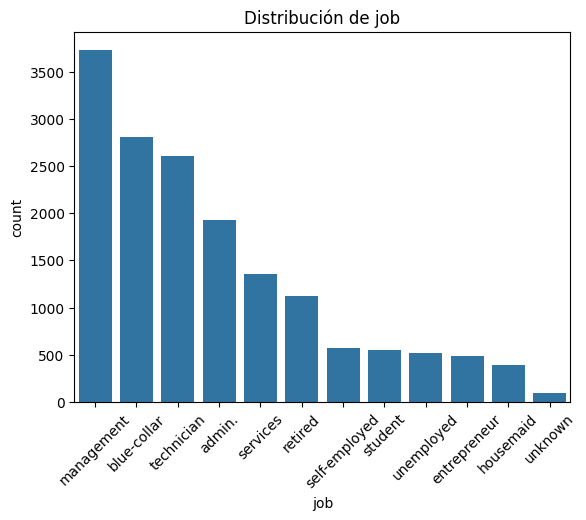

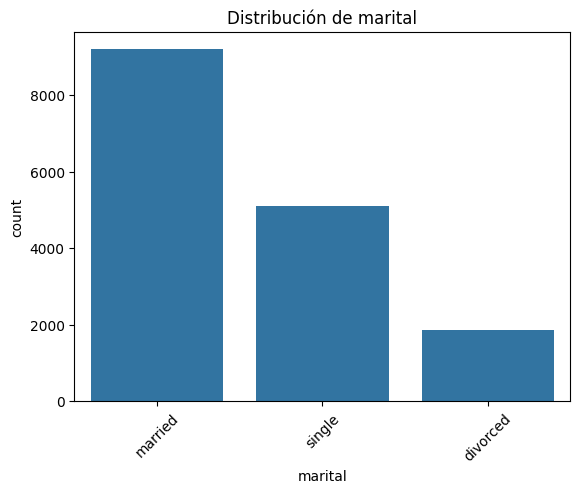

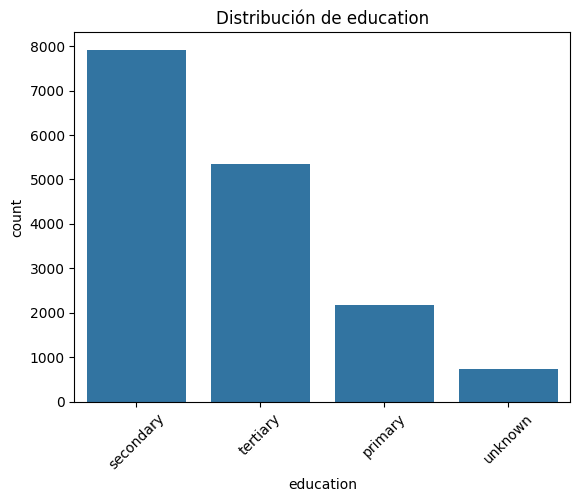

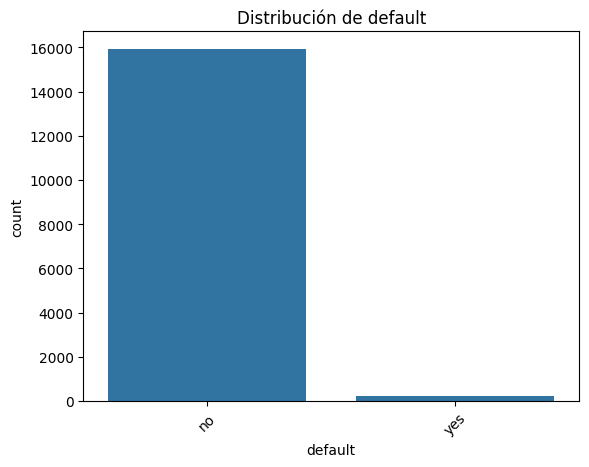

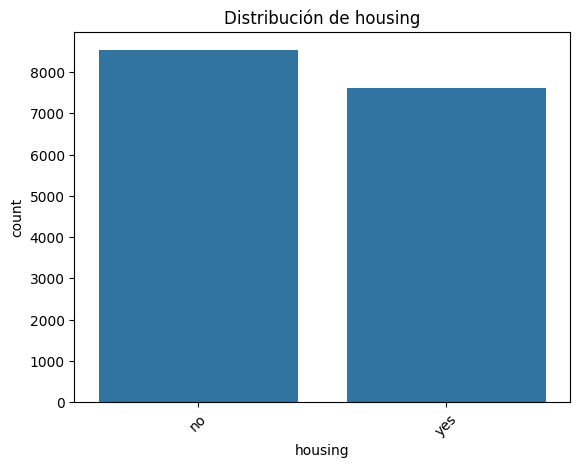

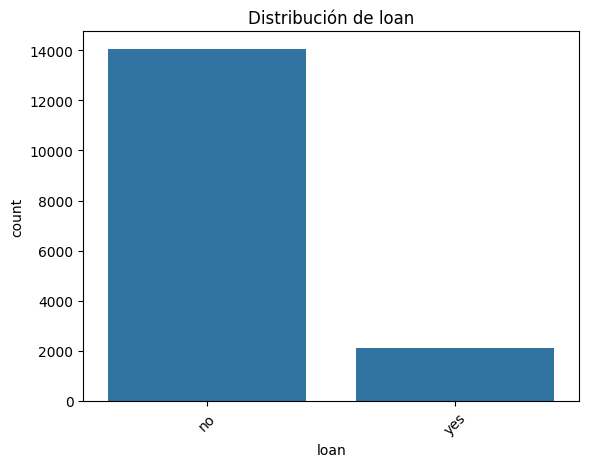

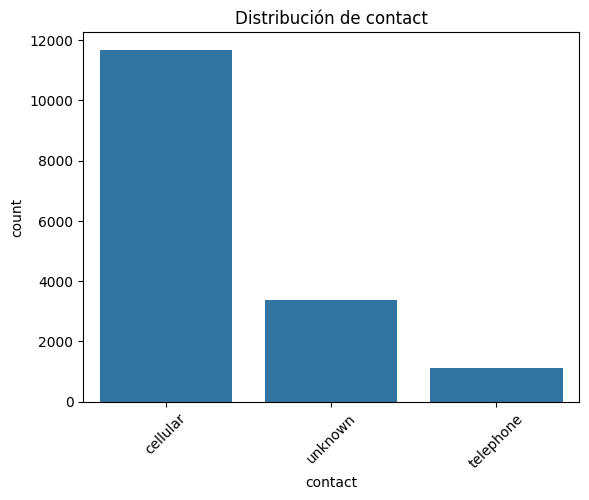

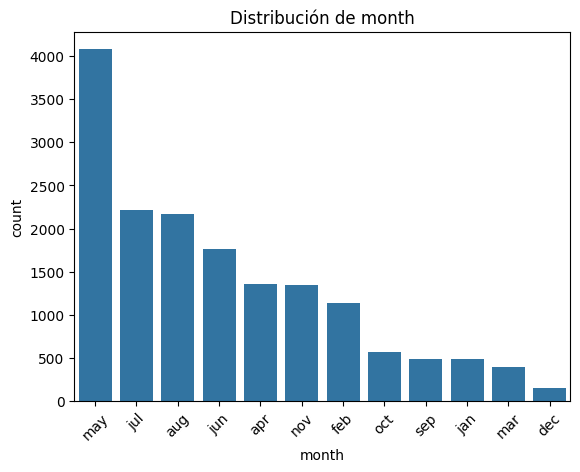

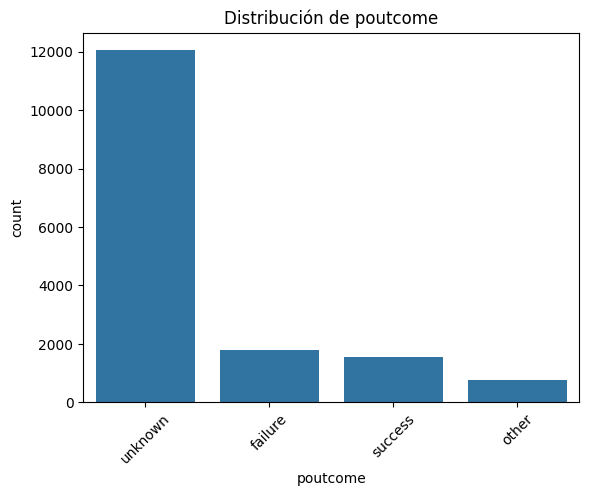

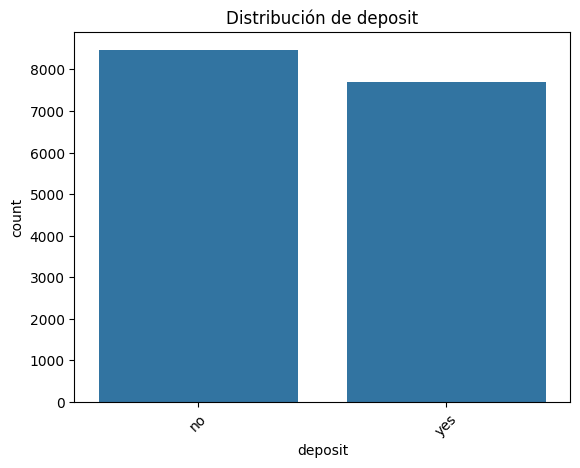

In [21]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']

for col in categorical_cols:
    sns.countplot(x=col, data=df_bank, order=df_bank[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

Gráficos de relaciones entre variables

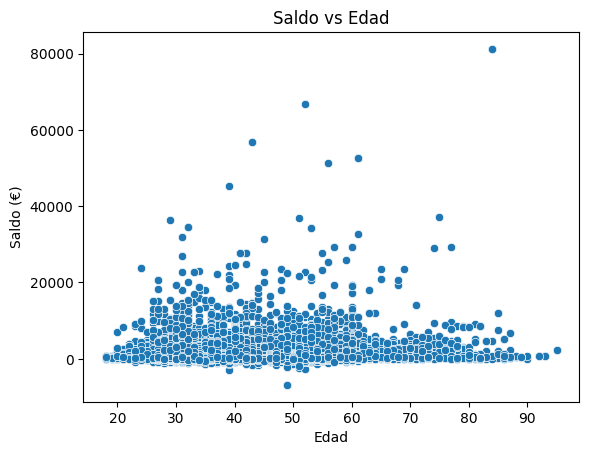

In [22]:
# Scatterplot balance vs age
sns.scatterplot(x='age', y='balance', data=df_bank)
plt.title("Saldo vs Edad")
plt.xlabel("Edad")
plt.ylabel("Saldo (€)")
plt.show()

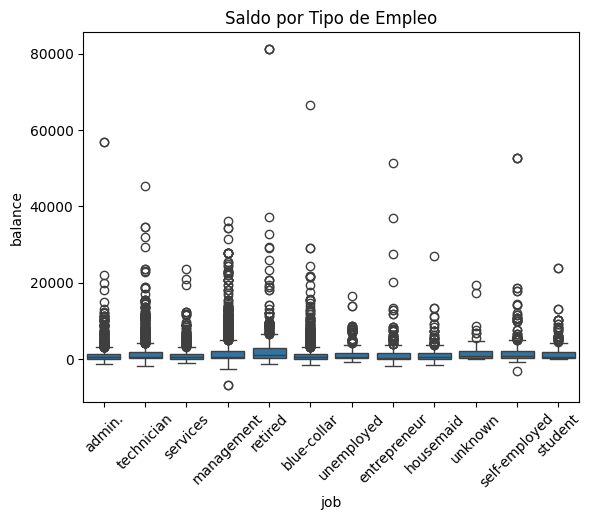

In [23]:
# Boxplot balance por job
sns.boxplot(x='job', y='balance', data=df_bank)
plt.title("Saldo por Tipo de Empleo")
plt.xticks(rotation=45)
plt.show()


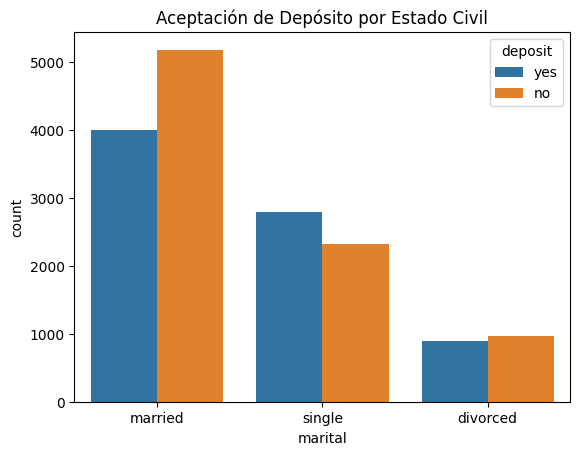

In [24]:
# Barplot apilado deposit vs marital
sns.countplot(x='marital', hue='deposit', data=df_bank)
plt.title("Aceptación de Depósito por Estado Civil")
plt.show()